<a href="https://colab.research.google.com/github/Adhi1755/Pharma-Sales-Analysis/blob/main/Pharma_Slaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pharma Sales Analysis**
---
**About Dataset**

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:

**M01AB** - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances

**M01AE** - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives

**N02BA** - Other analgesics and antipyretics, Salicylic acid and derivatives

**N02BE/B** - Other analgesics and antipyretics, Pyrazolones and Anilides

**N05B** - Psycholeptics drugs, Anxiolytic drugs

**N05C** - Psycholeptics drugs, Hypnotics and sedatives drugs

**R03** - Drugs for obstructive airway diseases

**R06** - Antihistamines for systemic use

Sales data are resampled to the hourly, daily, weekly and monthly periods. Data is already pre-processed, where processing included outlier detection and treatment and missing data imputation.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
salesDaily = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/salesdaily.csv')
salesHourly = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/saleshourly.csv')
salesMonthly = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/salesmonthly.csv')
salesWeekly = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/salesweekly.csv')

In [9]:
datasets = {
    "Daily": salesDaily,
    "Hourly": salesHourly,
    "Weekly": salesWeekly,
    "Monthly": salesMonthly
}

for name, df in datasets.items():
    print(f"\n{name} Dataset\n")
    print("\n")
    print(df.info())


Daily Dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2106 non-null   datetime64[ns]
 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 214.0+ KB
None

Hourly Dataset



<class 'pandas.cor

In [6]:
for df in datasets.values():
    df["datum"] = pd.to_datetime(
        df["datum"],
        format="%m/%d/%Y",
        errors="coerce"   # converts invalid dates to NaT instead of crashing
    )
    df.sort_values("datum", inplace=True)

In [10]:
salesDaily.dtypes

,0
datum,datetime64[ns]
M01AB,float64
M01AE,float64
N02BA,float64
N02BE,float64
N05B,float64
N05C,float64
R03,float64
R06,float64
Year,int64


In [12]:
salesDaily.isnull().sum()

,0
datum,0
M01AB,0
M01AE,0
N02BA,0
N02BE,0
N05B,0
N05C,0
R03,0
R06,0
Year,0


In [16]:
salesDaily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [13]:
salesDaily.duplicated().sum()

np.int64(0)

<Axes: >

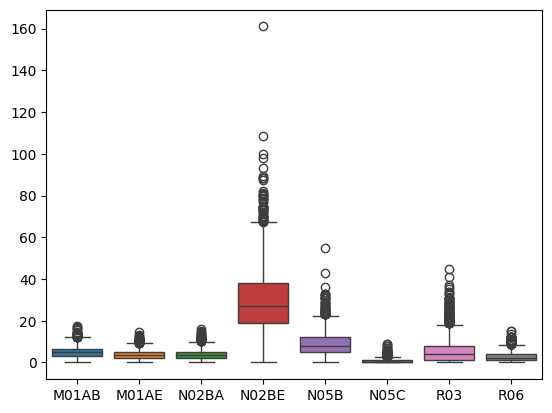

In [17]:
sns.boxplot(data=salesDaily[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']])

In [18]:
salesDaily['datum'].min(), salesDaily['datum'].max()

(Timestamp('2014-01-02 00:00:00'), Timestamp('2019-10-08 00:00:00'))

In [19]:
salesDaily['datum'].diff().value_counts().head()

,count
datum,
1 days,2105


<Axes: >

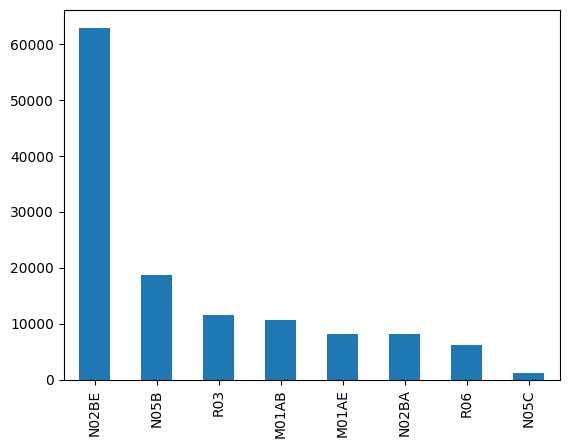

In [20]:
total_sales = salesDaily[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']].sum()
total_sales.sort_values(ascending=False).plot(kind='bar')

In [21]:
cv = salesDaily[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']].std() / \
     salesDaily[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']].mean()
cv.sort_values(ascending=False)

,0
N05C,1.841528
R03,1.166261
R06,0.832983
N05B,0.633142
N02BA,0.614366
M01AE,0.547595
M01AB,0.543852
N02BE,0.521139
